In [ ]:
!pip install mne

     |████████████████████████████████| 7.4 MB 5.0 MB/s 


In [ ]:
pip install mne-features

     |████████████████████████████████| 40 kB 2.9 MB/s 
  Created wheel for mne-features: filename=mne_features-0.2-py3-none-any.whl size=26760 sha256=d0d249192c29be072d713f55fc48d94daae9ccdb17d67bf73cba3b4d44b7d39e
  Stored in directory: /root/.cache/pip/wheels/50/7d/94/905a24736d6d8ecd07fb249d02af5391afed5054d26a0b66b8
Successfully built mne-features


In [ ]:
pip install numpy matplotlib scipy numba scikit-learn mne PyWavelets pandas

In [ ]:
pip install git+https://github.com/mne-tools/mne-features.git#egg=mne_features

  Cloning https://github.com/mne-tools/mne-features.git to /tmp/pip-install-w1kwl_9e/mne-features_4c89309a6a204ef9a6b998e78b98b0ea
  Running command git clone -q https://github.com/mne-tools/mne-features.git /tmp/pip-install-w1kwl_9e/mne-features_4c89309a6a204ef9a6b998e78b98b0ea


In [ ]:
pip install antropy

     |████████████████████████████████| 49 kB 2.7 MB/s 
  Created wheel for antropy: filename=antropy-0.1.4-py3-none-any.whl size=16159 sha256=f5fbf2ca82640f8983cd678237e0fcbdd8d87b0f7e46efdc1efd77104fd95587
  Stored in directory: /root/.cache/pip/wheels/d4/cc/6b/28fa7036bdabc6f1f92fd6a108ae259dbb48f107f676d6b491
Successfully built antropy


In [ ]:
import numpy as np 
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.model_selection import train_test_split
import fastdtw
#dtw for comparing two sequences and calculating the optimal matchinh between two sequences
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.signal import butter, lfilter, freqz, boxcar
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, euclidean_distances
from scipy.fftpack import fft, ifft
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_data = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_data.csv")
train_data_event = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_events.csv")
test_data = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/test/subj1_series10_data.csv")
test_data_event = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/test/subj1_series9_data.csv")

In [ ]:
train_complete = pd.concat([train_data,train_data_event], axis=1)
train_complete.insert(0, "order", range(0, len(train_complete)))
train_complete

,order,id,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,FC6,T7,C3,Cz,C4,T8,TP9,CP5,CP1,CP2,CP6,TP10,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10,id,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,0,subj1_series1_0,-31,363,211,121,211,15,717,279,35,158,543,-166,192,230,573,860,128,59,272,473,325,379,536,348,383,105,607,289,459,173,120,704,subj1_series1_0,0,0,0,0,0,0
1,1,subj1_series1_1,-29,342,216,123,222,200,595,329,43,166,495,-138,201,233,554,846,185,47,269,455,307,368,529,327,369,78,613,248,409,141,83,737,subj1_series1_1,0,0,0,0,0,0
2,2,subj1_series1_2,-172,278,105,93,222,511,471,280,12,177,534,-163,198,207,542,768,145,52,250,452,273,273,511,319,355,66,606,320,440,141,62,677,subj1_series1_2,0,0,0,0,0,0
3,3,subj1_series1_3,-272,263,-52,99,208,511,428,261,27,180,525,-310,212,221,542,808,115,41,276,432,258,241,521,336,356,71,568,339,437,139,58,592,subj1_series1_3,0,0,0,0,0,0
4,4,subj1_series1_4,-265,213,-67,99,155,380,476,353,32,165,507,-320,242,230,545,865,180,89,288,444,275,275,550,324,346,76,547,343,446,171,67,581,subj1_series1_4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119491,119491,subj1_series1_119491,478,520,377,172,141,118,-123,626,70,40,9,-95,73,-89,233,292,-85,-38,74,-34,2,-305,383,85,-1,444,337,-255,160,-121,-285,-178,subj1_series1_119491,0,0,0,0,0,0
119492,119492,subj1_series1_119492,439,450,298,185,128,502,-331,593,30,54,256,-224,49,-99,264,304,-210,-59,63,-19,10,-283,334,61,-8,427,322,-310,107,-152,-295,-178,subj1_series1_119492,0,0,0,0,0,0
119493,119493,subj1_series1_119493,363,370,278,239,124,768,-410,527,16,72,253,-394,35,-134,241,104,-164,-52,45,-45,16,-185,303,53,-24,438,368,-134,187,-99,-269,-121,subj1_series1_119493,0,0,0,0,0,0
119494,119494,subj1_series1_119494,281,298,318,257,130,736,-556,542,29,67,184,-260,42,-112,232,-168,-119,-30,54,-51,26,-177,341,50,-25,444,348,-135,181,-122,-290,-77,subj1_series1_119494,0,0,0,0,0,0


In [ ]:
df = pd.DataFrame(train_complete)

In [ ]:
new_data = df.drop(['id','Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7','T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P8', 'PO9','O1','Oz','O2','O2','PO10'], axis = 1)
new_data

,order,C3,Cz,C4,P3,Pz,P4,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,0,192,230,573,348,383,105,0,0,0,0,0,0
1,1,201,233,554,327,369,78,0,0,0,0,0,0
2,2,198,207,542,319,355,66,0,0,0,0,0,0
3,3,212,221,542,336,356,71,0,0,0,0,0,0
4,4,242,230,545,324,346,76,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119491,119491,73,-89,233,85,-1,444,0,0,0,0,0,0
119492,119492,49,-99,264,61,-8,427,0,0,0,0,0,0
119493,119493,35,-134,241,53,-24,438,0,0,0,0,0,0
119494,119494,42,-112,232,50,-25,444,0,0,0,0,0,0


In [ ]:
C3= train_data.loc[:,"C3"]
C3

0         192
1         201
2         198
3         212
4         242
         ... 
119491     73
119492     49
119493     35
119494     42
119495     38
Name: C3, Length: 119496, dtype: int64

In [ ]:
C4= train_data.loc[:,"C4"]
C4

0         573
1         554
2         542
3         542
4         545
         ... 
119491    233
119492    264
119493    241
119494    232
119495    238
Name: C4, Length: 119496, dtype: int64

In [ ]:
Cz= train_data.loc[:,"Cz"]
Cz

0         230
1         233
2         207
3         221
4         230
         ... 
119491    -89
119492    -99
119493   -134
119494   -112
119495   -113
Name: Cz, Length: 119496, dtype: int64

In [ ]:
P3= train_data.loc[:,"P3"]
P3

0         348
1         327
2         319
3         336
4         324
         ... 
119491     85
119492     61
119493     53
119494     50
119495     75
Name: P3, Length: 119496, dtype: int64

In [ ]:
P4= train_data.loc[:,"P4"]
P4

0         105
1          78
2          66
3          71
4          76
         ... 
119491    444
119492    427
119493    438
119494    444
119495    460
Name: P4, Length: 119496, dtype: int64

In [ ]:
Pz= train_data.loc[:,"Pz"]
Pz

0         383
1         369
2         355
3         356
4         346
         ... 
119491     -1
119492     -8
119493    -24
119494    -25
119495     -3
Name: Pz, Length: 119496, dtype: int64

In [ ]:
RP = new_data.loc[:,"Replace"]
RP

0         0
1         0
2         0
3         0
4         0
         ..
119491    0
119492    0
119493    0
119494    0
119495    0
Name: Replace, Length: 119496, dtype: int64

## **C3 Channel**

[307, 276, 320, 349, 328, 306, 317, 331, 275, 274, 324, 325, 371, 389, 403, 382, 339, 325, 340, 335, 375, 393, 368, 333, 331, 323, 335, 300, 360, 379, 356, 362, 366, 354, 376, 385, 421, 441, 437, 430, 401, 339, 342, 321, 310, 310, 326, 370, 370, 343, 321, 310, 360, 378, 378, 362, 349, 373, 366, 358, 360, 376, 361, 362, 379, 360, 353, 363, 357, 337, 384, 419, 423, 438, 398, 457, 404, 431, 445, 422, 388, 357, 361, 390, 378, 369, 375, 386, 352, 371, 350, 353, 339, 354, 317, 359, 380, 328, 351, 364, 370, 388, 309, 340, 380, 391, 386, 384, 393, 365, 371, 346, 370, 353, 316, 295, 298, 311, 321, 324, 346, 324, 295, 304, 307, 294, 303, 282, 255, 262, 265, 222, 236, 266, 267, 259, 260, 265, 277, 289, 272, 291, 304, 304, 359, 321, 304, 297, 298, 326, 375, 341, 366, 390, 397, 374, 396, 368, 315, 387, 395, 387, 360, 374, 373, 348, 346, 358, 385, 369, 349, 306, 339, 359, 369, 371, 377, 388, 378, 380, 410, 395, 353, 368, 347, 354, 375, 388, 373, 385, 413, 412, 368, 357, 372, 388, 358, 368, 366, 332,

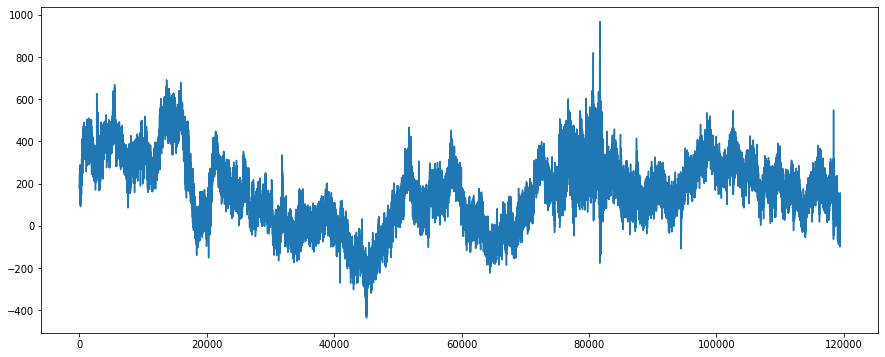

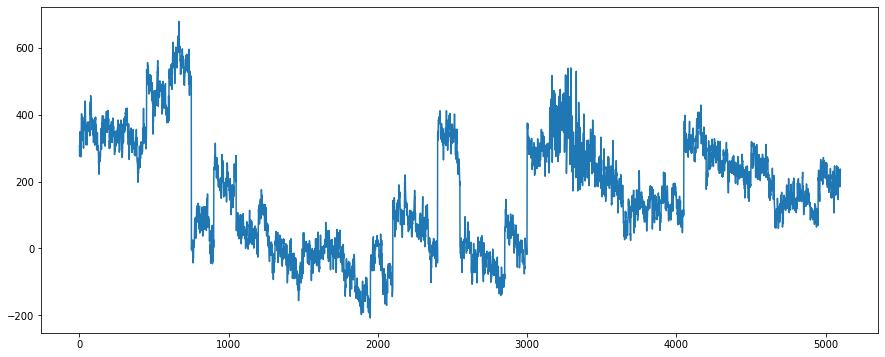

In [ ]:
C3_rp = []
for i in range(119495):
  if RP[i] == 1:
    C3_rp.append(C3[i])
 
print(C3_rp)

fig = plt.figure(figsize=(15, 6))
plt.plot(C3)

fig = plt.figure(figsize=(15, 6))
plt.plot(C3_rp)

<Figure size 1440x432 with 0 Axes>

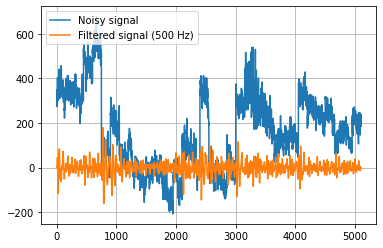

<Figure size 2160x720 with 0 Axes>

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( C3_rp, label='Noisy signal')

y = butter_bandpass_filter(C3_rp, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y))

5100


In [ ]:
from scipy.stats import norm, kurtosis
from scipy.stats import skew
import statistics

In [ ]:
y = np.array(y)
import statistics

median = np.median(y)
mean = y.mean()
var = statistics.variance(y)
std_dev = var ** 0.5
kurtosis = kurtosis(y)
skewness = skew(y)
peak2peak = max(y)-min(y)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1018.6610364012541
median =  -0.8363332122227768
mean =  -0.004816705830170589
Standard Deviation =  31.91646967321502
kurtosis =  3.0619664954138903
skewness =  -0.022338191599098948
Peak to peak =  340.6930998792664


In [ ]:
import mne
import mne_features

In [ ]:
#1.mean
mne_features.univariate.compute_mean(y)

-0.004816705830170589

In [ ]:
#2.median
median = np.median(y)
median

-0.8363332122227768

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y)

1018.6610364012541

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y)

31.91646967321502

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y)

6.06196649541389

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y)

-0.022338191599098948

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y)

340.6930998792664

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y)

31.91334081765479

In [ ]:
#Freqeuncy Domain
#9.power spectrum density
mne_features.utils.power_spectrum(500,y)

(array([4.76892104e-01, 3.41084142e-01, 1.17099005e+00, 2.62484325e+01,
        8.59126099e+01, 6.42423122e+01, 6.08589249e+01, 5.67838021e+01,
        2.82479447e+01, 2.71506369e+01, 1.97203849e+01, 1.91612483e+01,
        1.94929062e+01, 1.85463272e+01, 2.15496744e+01, 1.05347909e+01,
        4.19471352e+00, 1.79601289e+00, 7.31604199e-01, 2.98318420e-01,
        1.03790216e-01, 3.57683799e-02, 1.87510552e-02, 7.59544490e-03,
        5.70163117e-03, 3.91730494e-03, 2.38445347e-03, 1.87195897e-03,
        1.47769137e-03, 1.14556893e-03, 1.15756699e-03, 8.72655931e-04,
        7.62321540e-04, 8.91201519e-04, 7.08314657e-04, 6.22721385e-04,
        6.16124546e-04, 5.95663601e-04, 5.12587132e-04, 4.99636660e-04,
        4.71315013e-04, 4.50385508e-04, 4.23767670e-04, 3.96453348e-04,
        3.82129736e-04, 3.63940400e-04, 3.42037510e-04, 3.35061244e-04,
        3.15301707e-04, 3.04364019e-04, 2.92784845e-04, 2.80315951e-04,
        2.69564659e-04, 2.60502893e-04, 2.50292026e-04, 2.434279

In [ ]:
import numpy as np
import antropy as ant

#10. Spectral entropy
print(ant.spectral_entropy(y, sf=500, method='welch', normalize=True))

0.511357158963786


In [ ]:
#11. Approximate entropy
print(ant.app_entropy(y))

0.5902193156892315


In [ ]:
#12.zero crossing
import numpy

zs = numpy.where(numpy.diff(numpy.sign(y)))[0]
zs
print(len(zs))

348


## **C4 Channel**

[570, 549, 537, 549, 592, 575, 606, 642, 607, 550, 591, 590, 638, 639, 630, 637, 630, 625, 637, 650, 620, 606, 655, 625, 587, 596, 606, 593, 593, 618, 601, 598, 610, 618, 584, 603, 596, 575, 599, 647, 629, 644, 646, 634, 641, 643, 635, 660, 625, 625, 594, 604, 615, 589, 619, 604, 578, 564, 564, 605, 627, 584, 557, 628, 639, 599, 620, 578, 600, 616, 588, 645, 643, 643, 667, 684, 684, 643, 646, 643, 659, 670, 643, 648, 669, 655, 654, 658, 650, 643, 664, 648, 647, 651, 640, 671, 665, 679, 677, 660, 652, 660, 659, 651, 670, 579, 584, 608, 598, 568, 552, 533, 535, 535, 535, 530, 530, 550, 551, 528, 559, 563, 557, 571, 586, 559, 505, 526, 541, 520, 545, 565, 588, 584, 572, 567, 591, 588, 590, 599, 592, 554, 556, 581, 565, 563, 568, 616, 625, 614, 407, 450, 430, 442, 462, 467, 484, 471, 524, 474, 455, 432, 431, 469, 427, 437, 454, 428, 410, 426, 450, 405, 422, 461, 420, 434, 446, 469, 401, 403, 437, 460, 466, 475, 449, 423, 410, 406, 411, 417, 388, 402, 408, 442, 426, 416, 433, 438, 465, 408,

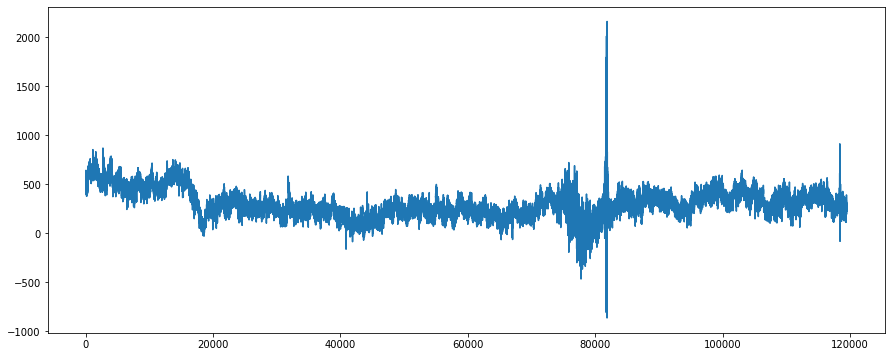

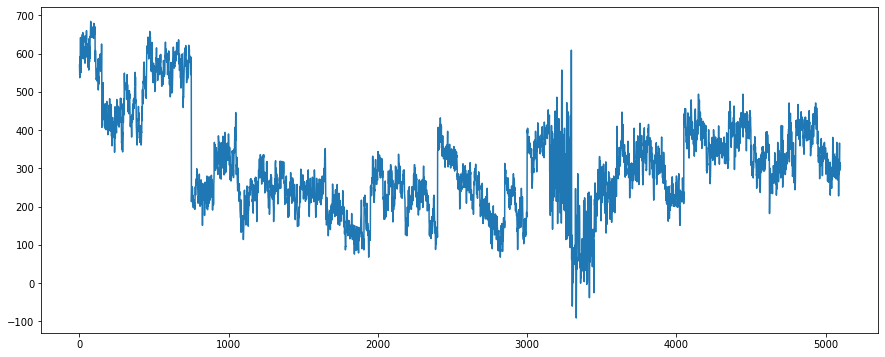

In [ ]:
C4_rp = []
for i in range(119495):
  if RP[i] == 1:
    C4_rp.append(C4[i])
 
print(C4_rp)

fig = plt.figure(figsize=(15, 6))
plt.plot(C4)

fig = plt.figure(figsize=(15, 6))
plt.plot(C4_rp)

<Figure size 1440x432 with 0 Axes>

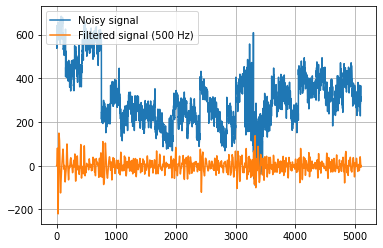

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( C4_rp, label='Noisy signal')

y2 = butter_bandpass_filter(C4_rp, lowcut, highcut, fs, order=6)

plt.plot( y2, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y2))

5100


In [ ]:
y2 = np.array(y2)
import statistics

median = np.median(y2)
mean = y2.mean()
var = statistics.variance(y2)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y2)
peak2peak = max(y2)-min(y2)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1023.4007597255044
median =  0.024862149742547093
mean =  0.027443590346451878
Standard Deviation =  31.990635500494584
kurtosis =  3.0619664954138903
skewness =  -0.14298209553103125
Peak to peak =  369.74435488712385


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y2)

0.027443590346451878

In [ ]:
#2.median
median = np.median(y2)
median

0.024862149742547093

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y2)

1023.4007597255044

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y2)

31.990635500494584

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y2)

6.508064616014976

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y2)

-0.14298209553103125

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y2)

369.74435488712385

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y2)

31.987510782499523

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y2)

(array([4.87817579e-01, 3.47587557e-01, 8.80363484e-01, 3.04535104e+01,
        1.08608099e+02, 7.47845364e+01, 6.13032802e+01, 3.14700710e+01,
        3.53666722e+01, 2.71486414e+01, 1.99727191e+01, 1.94333145e+01,
        1.37729784e+01, 1.47839028e+01, 1.16787237e+01, 9.40354703e+00,
        4.93135443e+00, 1.78070632e+00, 8.07478822e-01, 1.98737336e-01,
        8.21511278e-02, 4.63108187e-02, 1.81778757e-02, 1.04527572e-02,
        4.82573418e-03, 6.80831886e-03, 2.27125524e-03, 2.24811654e-03,
        1.96170833e-03, 1.50005987e-03, 1.21901443e-03, 1.52418724e-03,
        1.03465099e-03, 8.70274905e-04, 8.63108584e-04, 9.34052661e-04,
        7.85718467e-04, 7.70183435e-04, 6.67018738e-04, 6.94577450e-04,
        6.27504245e-04, 5.95851320e-04, 5.64816300e-04, 5.39836631e-04,
        5.16115529e-04, 5.02218064e-04, 4.67023250e-04, 4.54547516e-04,
        4.32196521e-04, 4.18772877e-04, 3.98911635e-04, 3.85753655e-04,
        3.73509704e-04, 3.58066394e-04, 3.48486190e-04, 3.351770

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y2, sf=500, method='welch', normalize=True))

0.5054064455684316


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y2))

0.5871859436724889


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y2))

zs = numpy.where(numpy.diff(numpy.sign(y2)))[0]
zs

318


array([  17,   31,   55,   85,  117,  128,  130,  161,  186,  222,  247,
        248,  254,  277,  292,  296,  310,  328,  352,  394,  411,  452,
        470,  498,  517,  522,  529,  539,  557,  568,  576,  601,  630,
        655,  697,  712,  720,  732,  750,  767,  780,  806,  833,  866,
        897,  909,  917,  933,  951,  956,  969,  993, 1012, 1024, 1038,
       1050, 1055, 1067, 1086, 1114, 1119, 1129, 1156, 1176, 1188, 1201,
       1216, 1233, 1246, 1257, 1267, 1280, 1295, 1308, 1326, 1340, 1357,
       1377, 1401, 1413, 1421, 1438, 1468, 1482, 1488, 1507, 1530, 1555,
       1565, 1571, 1590, 1597, 1607, 1632, 1648, 1651, 1656, 1668, 1681,
       1707, 1713, 1715, 1736, 1771, 1779, 1786, 1805, 1830, 1842, 1848,
       1871, 1884, 1891, 1909, 1924, 1937, 1964, 1985, 2002, 2030, 2065,
       2093, 2125, 2147, 2181, 2199, 2214, 2233, 2257, 2271, 2277, 2283,
       2292, 2309, 2341, 2365, 2373, 2397, 2415, 2432, 2457, 2486, 2520,
       2549, 2570, 2593, 2617, 2642, 2660, 2676, 26

## **Cz Channel**

[100, 81, 86, 113, 98, 98, 94, 111, 75, 68, 89, 74, 98, 108, 122, 118, 106, 98, 126, 129, 128, 134, 137, 119, 120, 99, 110, 88, 95, 122, 114, 106, 108, 108, 141, 154, 155, 156, 153, 147, 163, 155, 151, 146, 139, 125, 132, 163, 137, 130, 103, 99, 129, 122, 133, 115, 102, 114, 116, 129, 121, 98, 89, 87, 109, 107, 111, 101, 113, 108, 129, 151, 138, 140, 149, 147, 132, 142, 136, 136, 141, 161, 139, 151, 160, 167, 184, 177, 171, 176, 162, 154, 172, 156, 154, 192, 189, 170, 158, 139, 125, 137, 128, 145, 156, 143, 128, 128, 121, 128, 134, 93, 100, 122, 116, 122, 124, 129, 112, 113, 119, 104, 86, 76, 90, 84, 83, 102, 99, 102, 125, 125, 130, 137, 126, 122, 141, 132, 142, 143, 147, 144, 129, 152, 185, 161, 171, 169, 167, 176, 72, 58, 60, 59, 76, 73, 85, 65, 82, 87, 61, 59, 55, 68, 41, 45, 48, 36, 45, 40, 45, 33, 44, 62, 67, 87, 97, 111, 68, 70, 76, 83, 77, 68, 82, 73, 79, 92, 81, 76, 79, 80, 56, 78, 75, 75, 78, 122, 99, 82, 83, 89, 93, 106, 102, 101, 93, 101, 74, 77, 56, 63, 47, 52, 40, 56, 69, 

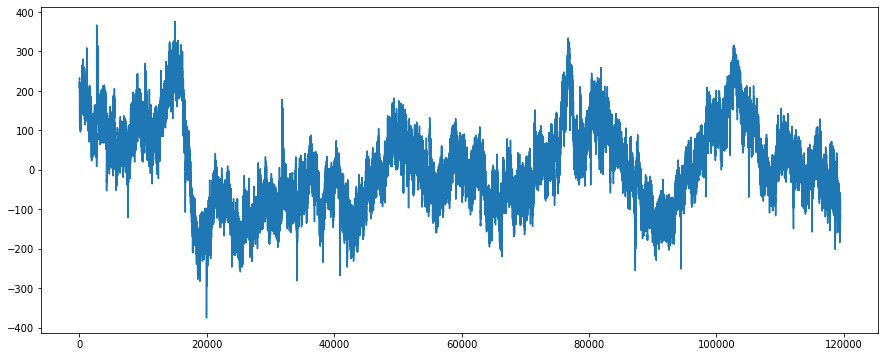

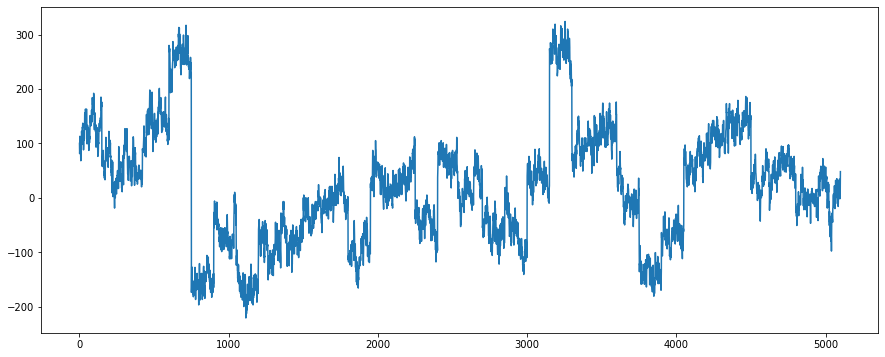

In [ ]:
Cz_rp = []
for i in range(119495):
  if RP[i] == 1:
    Cz_rp.append(Cz[i])
 
print(Cz_rp)

fig = plt.figure(figsize=(15, 6))
plt.plot(Cz)

fig = plt.figure(figsize=(15, 6))
plt.plot(Cz_rp)

<Figure size 1440x432 with 0 Axes>

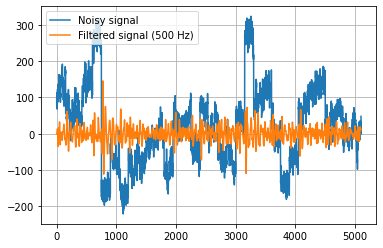

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( Cz_rp, label='Noisy signal')

y3 = butter_bandpass_filter(Cz_rp, lowcut, highcut, fs, order=6)

plt.plot( y3, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y3))

5100


In [ ]:
y3 = np.array(y3)
import statistics

median = np.median(y3)
mean = y3.mean()
var = statistics.variance(y3)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y3)
peak2peak = max(y3)-min(y3)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  471.0239623732125
median =  -0.25147730514286193
mean =  0.025864616160777565
Standard Deviation =  21.703086471126923
kurtosis =  3.0619664954138903
skewness =  0.1322230988457554
Peak to peak =  257.2451719436057


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y3)

0.025864616160777565

In [ ]:
#2.median
median = np.median(y3)
median

-0.25147730514286193

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y3)

471.0239623732125

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y3)

21.703086471126923

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y3)

6.341432467990514

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y3)

0.1322230988457554

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y3)

257.2451719436057

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y3)

21.70097402680121

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y3)

(array([3.28256787e-01, 2.56216014e-01, 5.39505242e-01, 1.25508221e+01,
        5.22861032e+01, 3.66173478e+01, 2.75282598e+01, 2.18903795e+01,
        1.97519770e+01, 1.23177710e+01, 1.14192658e+01, 1.17772810e+01,
        9.19325607e+00, 7.15334919e+00, 4.19752143e+00, 2.70205173e+00,
        2.10274071e+00, 8.67966788e-01, 3.07845024e-01, 1.03100764e-01,
        3.74784454e-02, 1.74687293e-02, 7.60210701e-03, 3.26065329e-03,
        3.22301223e-03, 2.29728290e-03, 1.51233727e-03, 1.47982155e-03,
        9.54272980e-04, 8.24978417e-04, 9.19587038e-04, 7.57137976e-04,
        5.97857527e-04, 6.37777159e-04, 5.78213714e-04, 5.08572255e-04,
        4.95824418e-04, 4.81549579e-04, 4.21257973e-04, 4.16311464e-04,
        3.87715661e-04, 3.68621286e-04, 3.44092826e-04, 3.33182412e-04,
        3.17104133e-04, 2.98507362e-04, 2.88194717e-04, 2.74078386e-04,
        2.62808252e-04, 2.52589308e-04, 2.42889954e-04, 2.33053956e-04,
        2.24312345e-04, 2.16300242e-04, 2.08916460e-04, 2.016449

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y3, sf=500, method='welch', normalize=True))

0.4923260067512976


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y3))

0.5700734747664851


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y))

zs = numpy.where(numpy.diff(numpy.sign(y3)))[0]
zs

348


array([  16,   29,   54,   67,   73,   80,   86,  100,  131,  166,  188,
        209,  242,  273,  309,  332,  352,  362,  365,  384,  411,  430,
        441,  452,  469,  497,  519,  531,  535,  557,  577,  602,  616,
        628,  644,  691,  707,  720,  725,  740,  757,  767,  780,  804,
        833,  870,  903,  931,  959,  988, 1026, 1064, 1083, 1114, 1144,
       1174, 1189, 1203, 1216, 1228, 1242, 1250, 1261, 1277, 1294, 1307,
       1325, 1340, 1355, 1362, 1366, 1387, 1407, 1410, 1417, 1438, 1467,
       1479, 1488, 1507, 1520, 1527, 1545, 1586, 1615, 1637, 1647, 1666,
       1690, 1703, 1706, 1718, 1726, 1737, 1754, 1765, 1777, 1791, 1803,
       1818, 1831, 1857, 1882, 1911, 1929, 1934, 1942, 1953, 1963, 1981,
       2003, 2036, 2041, 2048, 2063, 2071, 2082, 2108, 2120, 2128, 2138,
       2142, 2155, 2172, 2183, 2194, 2214, 2238, 2248, 2254, 2259, 2267,
       2280, 2304, 2338, 2370, 2384, 2399, 2416, 2432, 2456, 2483, 2515,
       2526, 2531, 2550, 2578, 2592, 2619, 2624, 26

## **P3 Channel**

[341, 300, 362, 415, 379, 374, 401, 417, 341, 337, 388, 393, 433, 449, 462, 461, 426, 415, 413, 400, 426, 480, 460, 386, 383, 387, 355, 327, 364, 407, 411, 428, 425, 426, 448, 480, 491, 522, 528, 533, 478, 421, 442, 414, 414, 427, 436, 502, 522, 464, 413, 398, 411, 411, 436, 418, 372, 378, 401, 415, 434, 454, 445, 470, 475, 486, 506, 490, 437, 444, 453, 476, 507, 511, 507, 543, 512, 511, 529, 519, 518, 499, 479, 487, 484, 474, 511, 494, 483, 503, 498, 500, 498, 473, 439, 477, 503, 470, 492, 468, 445, 455, 452, 473, 501, 499, 506, 504, 473, 419, 427, 411, 417, 428, 395, 390, 387, 357, 343, 345, 373, 347, 290, 294, 331, 309, 344, 355, 337, 311, 298, 289, 309, 341, 354, 346, 349, 355, 363, 369, 355, 336, 338, 383, 472, 426, 387, 363, 363, 383, 290, 261, 287, 326, 353, 318, 327, 311, 306, 319, 316, 310, 305, 339, 316, 274, 293, 290, 256, 239, 269, 263, 277, 313, 351, 380, 357, 352, 318, 311, 330, 336, 340, 336, 321, 325, 316, 320, 341, 333, 312, 327, 300, 311, 329, 358, 344, 323, 319, 333,

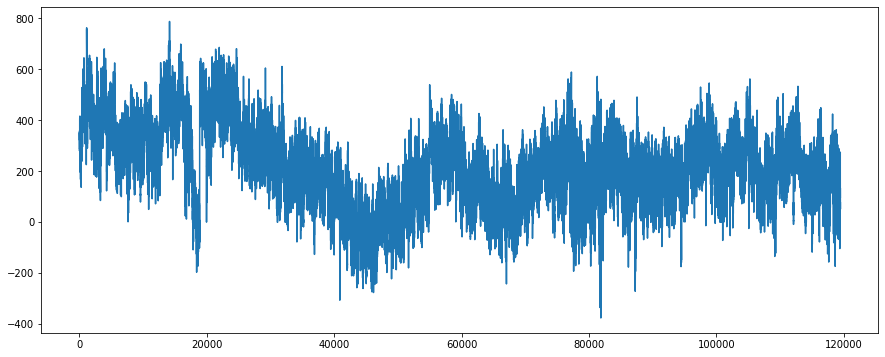

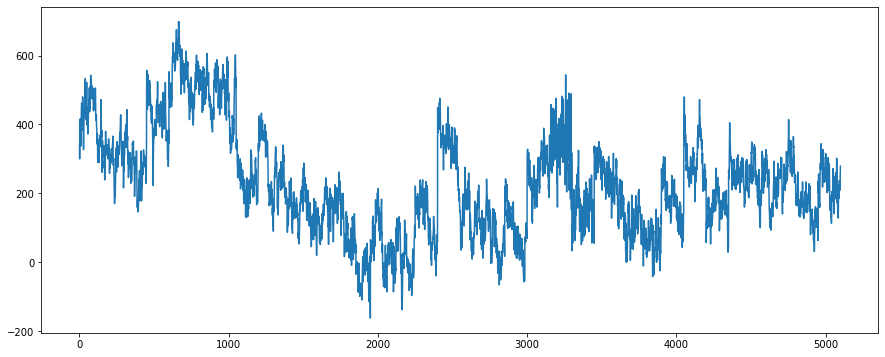

In [ ]:
P3_rp = []
for i in range(119495):
  if RP[i] == 1:
    P3_rp.append(P3[i])
 
print(P3_rp)

fig = plt.figure(figsize=(15, 6))
plt.plot(P3)

fig = plt.figure(figsize=(15, 6))
plt.plot(P3_rp)

<Figure size 1440x432 with 0 Axes>

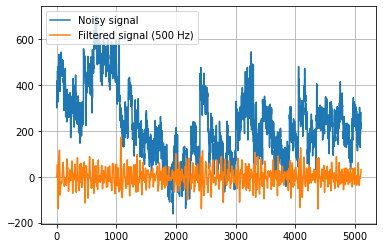

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( P3_rp, label='Noisy signal')

y4 = butter_bandpass_filter(P3_rp, lowcut, highcut, fs, order=6)

plt.plot( y4, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y4))

5100


In [ ]:
y4 = np.array(y4)
import statistics

median = np.median(y4)
mean = y4.mean()
var = statistics.variance(y4)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y4)
peak2peak = max(y4)-min(y4)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1495.5896514136107
median =  -0.9688606155027752
mean =  0.0013003928716523205
Standard Deviation =  38.67285419274883
kurtosis =  3.0619664954138903
skewness =  0.020350701654106
Peak to peak =  312.30688011136857


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y4)

0.0013003928716523205

In [ ]:
#2.median
median = np.median(y4)
median

-0.9688606155027752

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y4)

1495.5896514136105

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y4)

38.67285419274883

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y4)

3.6008505072461006

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y4)

0.020350701654106

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y4)

312.30688011136857

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y4)

38.669062572446805

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y4)

(array([9.12415052e-01, 6.29296452e-01, 1.58464663e+00, 4.33807591e+01,
        1.29483647e+02, 1.36408287e+02, 8.68310181e+01, 6.86222901e+01,
        5.96421413e+01, 6.33755042e+01, 4.36236945e+01, 3.21674383e+01,
        2.61416653e+01, 2.39728717e+01, 1.52862388e+01, 9.62094922e+00,
        6.37893272e+00, 2.67530987e+00, 9.05991930e-01, 3.83114011e-01,
        1.30874638e-01, 7.12523605e-02, 3.60018829e-02, 1.25140744e-02,
        1.03528341e-02, 7.93904623e-03, 5.20547202e-03, 3.66803641e-03,
        3.04211580e-03, 3.08929738e-03, 2.80279032e-03, 2.15493193e-03,
        1.83825728e-03, 2.04890291e-03, 1.75929703e-03, 1.62586703e-03,
        1.54587809e-03, 1.43616295e-03, 1.37388139e-03, 1.29015666e-03,
        1.18769494e-03, 1.18616340e-03, 1.07923564e-03, 1.05512946e-03,
        9.99955899e-04, 9.50765316e-04, 9.12203270e-04, 8.74420308e-04,
        8.38815444e-04, 8.07826562e-04, 7.73328470e-04, 7.48405330e-04,
        7.18110211e-04, 6.94522553e-04, 6.71032908e-04, 6.486715

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y4, sf=500, method='welch', normalize=True))

0.503468348973872


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y4))

0.609557824629892


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y4))

zs = numpy.where(numpy.diff(numpy.sign(y4)))[0]
zs

314


array([  17,   31,   53,   92,  120,  166,  191,  218,  232,  246,  261,
        276,  289,  296,  315,  338,  356,  383,  395,  402,  414,  435,
        448,  452,  467,  481,  506,  507,  515,  532,  537,  541,  562,
        598,  616,  630,  642,  650,  663,  675,  677,  691,  705,  715,
        722,  742,  760,  775,  786,  803,  827,  856,  868,  876,  896,
        929,  959,  986, 1007, 1018, 1034, 1066, 1083, 1113, 1142, 1147,
       1148, 1175, 1191, 1203, 1215, 1229, 1255, 1283, 1298, 1310, 1323,
       1338, 1354, 1388, 1405, 1409, 1418, 1436, 1453, 1462, 1468, 1481,
       1493, 1508, 1546, 1570, 1591, 1596, 1612, 1626, 1637, 1657, 1691,
       1715, 1728, 1735, 1754, 1767, 1779, 1790, 1802, 1816, 1836, 1838,
       1839, 1855, 1860, 1868, 1882, 1921, 1945, 1952, 1962, 1986, 2003,
       2025, 2035, 2048, 2061, 2075, 2084, 2092, 2117, 2149, 2162, 2164,
       2183, 2206, 2233, 2259, 2265, 2274, 2298, 2323, 2339, 2351, 2365,
       2375, 2379, 2397, 2416, 2431, 2453, 2484, 25

## **P4 Channel**

[326, 288, 301, 323, 331, 340, 366, 424, 350, 269, 342, 353, 353, 350, 370, 389, 356, 365, 389, 369, 311, 331, 371, 303, 312, 333, 288, 262, 301, 345, 353, 321, 333, 357, 394, 386, 380, 392, 408, 417, 379, 367, 374, 360, 361, 338, 349, 395, 390, 370, 328, 323, 317, 302, 344, 320, 286, 278, 295, 345, 361, 317, 247, 309, 342, 313, 354, 323, 318, 327, 322, 369, 375, 406, 443, 464, 444, 437, 436, 447, 422, 440, 429, 432, 445, 411, 453, 466, 449, 464, 466, 472, 484, 440, 440, 476, 484, 488, 473, 466, 447, 454, 425, 410, 470, 414, 399, 394, 365, 335, 323, 285, 283, 284, 283, 289, 262, 279, 280, 210, 233, 213, 204, 210, 241, 215, 188, 258, 282, 259, 266, 309, 276, 260, 294, 297, 313, 283, 270, 311, 316, 269, 255, 302, 355, 354, 326, 328, 346, 353, 228, 235, 216, 239, 302, 303, 309, 305, 368, 311, 286, 289, 306, 317, 264, 267, 286, 288, 231, 242, 305, 258, 256, 295, 303, 269, 319, 328, 193, 215, 247, 252, 256, 263, 261, 220, 210, 266, 253, 258, 248, 273, 282, 297, 318, 288, 302, 336, 356, 317,

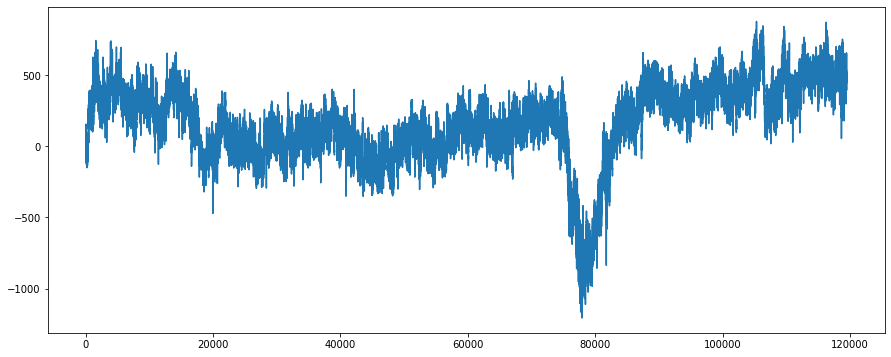

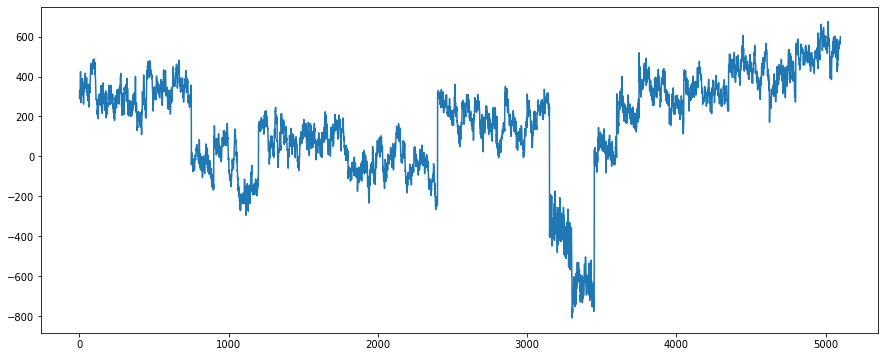

In [ ]:
P4_rp = []
for i in range(119495):
  if RP[i] == 1:
    P4_rp.append(P4[i])
 
print(P4_rp)

fig = plt.figure(figsize=(15, 6))
plt.plot(P4)

fig = plt.figure(figsize=(15, 6))
plt.plot(P4_rp)

<Figure size 1440x432 with 0 Axes>

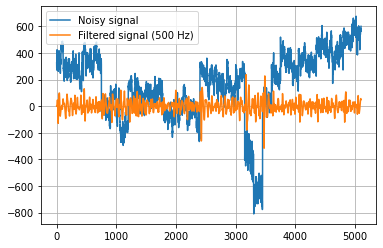

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( P4_rp, label='Noisy signal')

y5 = butter_bandpass_filter(P4_rp, lowcut, highcut, fs, order=6)

plt.plot( y5, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y5))

5100


In [ ]:
y5 = np.array(y5)
import statistics

median = np.median(y5)
mean = y5.mean()
var = statistics.variance(y5)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y5)
peak2peak = max(y5)-min(y5)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  2279.6109573159974
median =  -0.5500021944489351
mean =  0.06800573839449023
Standard Deviation =  47.745271570240305
kurtosis =  3.0619664954138903
skewness =  -0.19875925088936286
Peak to peak =  552.5611404065932


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y5)

0.06800573839449023

In [ ]:
#2.median
median = np.median(y5)
median

-0.5500021944489351

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y5)

2279.6109573159974

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y5)

47.745271570240305

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y5)

6.3837083388660645

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y5)

-0.19875925088936286

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y5)

552.5611404065932

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y5)

47.74063886832477

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y5)

(array([1.49369730e+00, 9.96489481e-01, 2.12618867e+00, 7.39767990e+01,
        3.09180871e+02, 2.65944243e+02, 1.96594684e+02, 1.48290928e+02,
        1.18223672e+02, 1.04542987e+02, 8.22573588e+01, 6.27410260e+01,
        4.07792845e+01, 2.46026837e+01, 2.05163750e+01, 1.68396355e+01,
        9.70138139e+00, 5.05492894e+00, 1.93643896e+00, 7.49455229e-01,
        2.76710915e-01, 1.27086800e-01, 4.48841502e-02, 1.98124978e-02,
        1.15279472e-02, 9.10659690e-03, 6.71569899e-03, 4.39190694e-03,
        3.60935585e-03, 3.09400977e-03, 2.68392878e-03, 2.69579332e-03,
        2.15168267e-03, 2.09237178e-03, 1.73219926e-03, 1.82181330e-03,
        1.52742015e-03, 1.59788722e-03, 1.39294348e-03, 1.37373840e-03,
        1.23769666e-03, 1.22737193e-03, 1.12396769e-03, 1.09887597e-03,
        1.02705375e-03, 9.94750991e-04, 9.38201805e-04, 9.06027470e-04,
        8.63370714e-04, 8.31166019e-04, 7.97284446e-04, 7.68895406e-04,
        7.39208582e-04, 7.13458521e-04, 6.88800870e-04, 6.642047

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y5, sf=500, method='welch', normalize=True))

0.4896954464442193


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y5))

0.5678693260271621


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y5))

zs = numpy.where(numpy.diff(numpy.sign(y5)))[0]
zs

282


array([  17,   31,   52,   81,   88,   98,  135,  162,  192,  224,  256,
        277,  290,  297,  312,  337,  355,  394,  412,  432,  438,  452,
        468,  485,  489,  494,  517,  543,  561,  570,  576,  597,  617,
        628,  631,  651,  665,  671,  679,  691,  700,  711,  722,  734,
        757,  769,  781,  805,  833,  867,  894,  910,  915,  930,  957,
        987, 1009, 1014, 1027, 1051, 1057, 1063, 1086, 1115, 1144, 1177,
       1216, 1230, 1255, 1280, 1297, 1312, 1325, 1340, 1356, 1380, 1402,
       1413, 1419, 1439, 1467, 1480, 1489, 1506, 1539, 1540, 1543, 1572,
       1587, 1594, 1609, 1631, 1659, 1668, 1690, 1715, 1730, 1734, 1754,
       1768, 1776, 1789, 1806, 1819, 1827, 1852, 1884, 1913, 1944, 1950,
       1961, 1986, 2004, 2028, 2038, 2045, 2063, 2090, 2122, 2148, 2181,
       2201, 2218, 2237, 2258, 2271, 2295, 2315, 2339, 2355, 2367, 2396,
       2416, 2431, 2456, 2483, 2521, 2542, 2567, 2591, 2611, 2650, 2663,
       2674, 2689, 2696, 2710, 2737, 2766, 2798, 28

## **Pz Channel**

[375, 331, 364, 398, 393, 384, 389, 413, 351, 325, 382, 364, 398, 419, 441, 443, 428, 417, 431, 417, 419, 415, 432, 388, 375, 388, 361, 331, 360, 405, 401, 397, 404, 432, 471, 468, 474, 513, 507, 497, 453, 423, 453, 427, 411, 406, 405, 437, 443, 427, 378, 372, 393, 370, 395, 379, 364, 341, 373, 397, 398, 377, 362, 388, 435, 427, 460, 441, 417, 394, 415, 449, 458, 469, 479, 496, 488, 478, 497, 500, 486, 482, 460, 447, 475, 465, 504, 511, 499, 515, 519, 512, 512, 500, 483, 511, 523, 508, 491, 478, 444, 451, 415, 435, 461, 444, 439, 428, 399, 368, 389, 363, 365, 383, 356, 345, 329, 336, 326, 299, 308, 286, 271, 264, 284, 270, 262, 300, 306, 300, 304, 336, 338, 348, 363, 366, 384, 359, 360, 399, 383, 362, 361, 407, 458, 426, 423, 410, 408, 401, 229, 208, 198, 239, 271, 270, 282, 290, 307, 285, 275, 262, 274, 293, 268, 261, 245, 266, 243, 206, 250, 256, 240, 275, 284, 273, 289, 299, 247, 240, 258, 279, 271, 265, 270, 242, 247, 280, 268, 266, 268, 258, 249, 297, 295, 299, 299, 321, 316, 285,

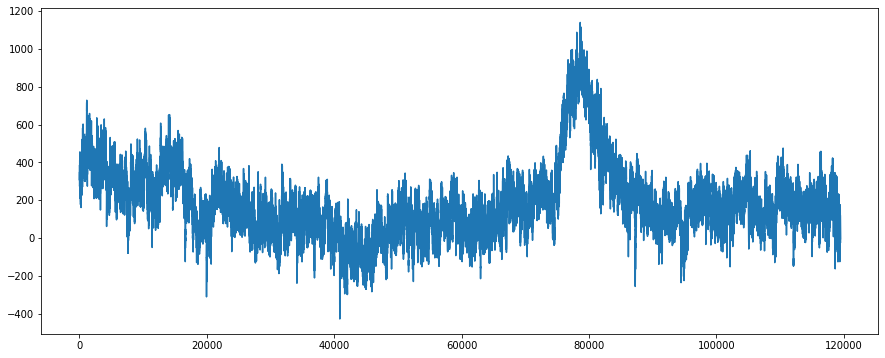

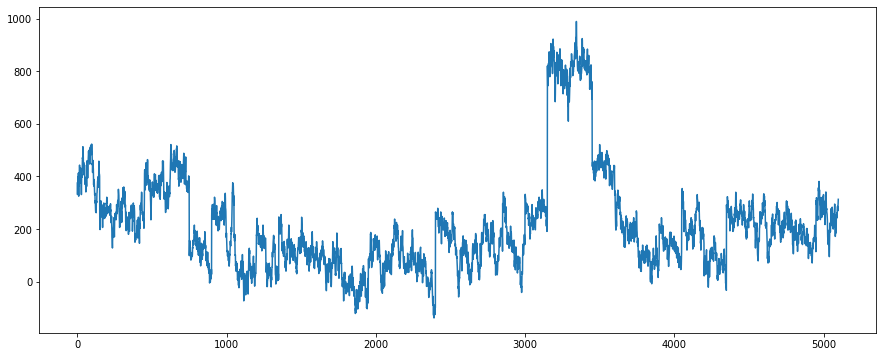

In [ ]:
Pz_rp = []
for i in range(119495):
  if RP[i] == 1:
    Pz_rp.append(Pz[i])
 
print(Pz_rp)

fig = plt.figure(figsize=(15, 6))
plt.plot(Pz)

fig = plt.figure(figsize=(15, 6))
plt.plot(Pz_rp)

<Figure size 1440x432 with 0 Axes>

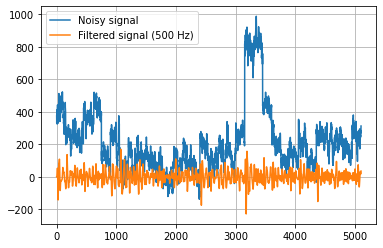

<Figure size 2160x720 with 0 Axes>

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( Pz_rp, label='Noisy signal')

y6 = butter_bandpass_filter(Pz_rp, lowcut, highcut, fs, order=6)

plt.plot( y6, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
#plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
#plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

In [ ]:
print(len(y6))

5100


In [ ]:
y6 = np.array(y6)
import statistics

median = np.median(y6)
mean = y6.mean()
var = statistics.variance(y6)
std_dev = var ** 0.5
#kurtosis = kurtosis(y)
skewness = skew(y6)
peak2peak = max(y6)-min(y6)

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)
print("kurtosis = ",kurtosis)
print("skewness = ", skewness)
print("Peak to peak = ", peak2peak)

variance =  1660.1671283736318
median =  -0.5861112996715794
mean =  0.02857983057295789
Standard Deviation =  40.74514852560525
kurtosis =  3.0619664954138903
skewness =  -0.06729933496305927
Peak to peak =  398.61144607710617


In [ ]:
#1.mean
mne_features.univariate.compute_mean(y6)

0.02857983057295789

In [ ]:
#2.median
median = np.median(y6)
median

-0.5861112996715794

In [ ]:
#3.variance
mne_features.univariate.compute_variance(y6)

1660.1671283736323

In [ ]:
#4.std deviation
mne_features.univariate.compute_std(y6)

40.74514852560526

In [ ]:
#5.kurtosis
mne_features.univariate.compute_kurtosis(y6)

4.579259315492717

In [ ]:
#6.skewness
mne_features.univariate.compute_skewness(y6)

-0.06729933496305927

In [ ]:
#7.peak to peak
mne_features.univariate.compute_ptp_amp(y6)

398.61144607710617

In [ ]:
#8.rms
mne_features.univariate.compute_rms(y6)

40.74116373170997

In [ ]:
#9.power spectrum density
mne_features.utils.power_spectrum(500,y6)

(array([7.61898742e-01, 5.20326385e-01, 2.18898552e+00, 5.41127557e+01,
        2.09353738e+02, 2.11244837e+02, 1.19394881e+02, 8.22274076e+01,
        7.28688732e+01, 6.72198306e+01, 5.05954278e+01, 2.93617527e+01,
        2.64893996e+01, 2.82728830e+01, 1.88494292e+01, 9.60982801e+00,
        5.80885301e+00, 2.14909412e+00, 8.22805174e-01, 4.07342182e-01,
        1.33260767e-01, 4.00556180e-02, 2.47325212e-02, 1.07101475e-02,
        7.55833100e-03, 7.27281235e-03, 4.00374194e-03, 3.49107585e-03,
        2.47982626e-03, 2.25639200e-03, 2.23857173e-03, 1.61121156e-03,
        1.53986085e-03, 1.66028634e-03, 1.31092912e-03, 1.34352890e-03,
        1.21243896e-03, 1.18457554e-03, 1.08458481e-03, 1.04499917e-03,
        9.64222552e-04, 9.47594059e-04, 8.76792302e-04, 8.52739284e-04,
        8.01027899e-04, 7.77413481e-04, 7.33131554e-04, 7.09579251e-04,
        6.78410929e-04, 6.53905807e-04, 6.27220911e-04, 6.04993893e-04,
        5.83883344e-04, 5.62724212e-04, 5.44499182e-04, 5.261267

In [ ]:
# 10.Spectral entropy
print(ant.spectral_entropy(y6, sf=500, method='welch', normalize=True))

0.483560382476425


In [ ]:
# 11.Approximate entropy
print(ant.app_entropy(y6))

0.5791873962332814


In [ ]:
#12.zero crossing
import numpy
# Number of zero-crossings
print(ant.num_zerocross(y6))

zs = numpy.where(numpy.diff(numpy.sign(y6)))[0]
zs

284


array([  17,   30,   53,   94,  127,  164,  188,  220,  258,  281,  311,
        336,  356,  382,  396,  401,  414,  433,  442,  451,  467,  483,
        516,  540,  560,  596,  614,  631,  638,  651,  666,  672,  677,
        693,  703,  711,  727,  736,  757,  769,  782,  805,  831,  864,
        893,  909,  912,  929,  957,  987, 1010, 1014, 1027, 1064, 1084,
       1115, 1144, 1177, 1196, 1202, 1215, 1230, 1254, 1280, 1296, 1312,
       1324, 1339, 1357, 1382, 1404, 1438, 1467, 1482, 1491, 1506, 1522,
       1523, 1545, 1571, 1586, 1592, 1612, 1630, 1645, 1664, 1690, 1714,
       1728, 1737, 1754, 1767, 1777, 1788, 1804, 1819, 1827, 1836, 1857,
       1867, 1886, 1914, 1931, 1951, 1963, 1985, 2003, 2030, 2036, 2045,
       2062, 2090, 2117, 2147, 2181, 2200, 2225, 2242, 2245, 2268, 2282,
       2290, 2296, 2318, 2339, 2355, 2364, 2373, 2381, 2396, 2416, 2431,
       2456, 2484, 2516, 2542, 2577, 2593, 2622, 2671, 2706, 2733, 2765,
       2798, 2828, 2857, 2873, 2881, 2899, 2928, 29